# Performance Visualisation of Search and MDP Algorithms

This notebook generates **visual comparisons** of search and MDP algorithms across different maze sizes.  
It evaluates **execution time, memory usage, path length, success rate, and convergence rate** to assess algorithm performance.

1. Compare **execution time** and **memory usage** across algorithms and maze sizes
2. Evaluate **path length** in search and MDP algorithms
3. Measure **success rate**, invalid maze attempts, and failed paths
4. Analyse **convergence rates** for MDP algorithms
5. Investigate **relationships between path length and execution time**


### **Preprocessing Steps:**

1. **Converted "Maze Size" to categorical** to prevent unwanted interpolation in visualisations.  
2. **Filtered top 10 most frequent maze sizes** for clear comparisons.  
3. **Added "Success" metric** to track whether a path was found.  
4. **Split dataset** into **search algorithms** (DFS, BFS, A*) and **MDP algorithms** (Value Iteration, Policy Iteration).


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the performance data
df = pd.read_csv("../data/results/performance_metrics.csv")

# Set seaborn style for better visuals
sns.set_style("whitegrid")

# Ensure "Maze Size" is stored as standard integer
df["Maze Size"] = df["Maze Size"].astype(int)  
top_n_sizes = df["Maze Size"].value_counts().nlargest(10).index.tolist()

df_filtered = df[df["Maze Size"].isin(top_n_sizes)].copy()
df_filtered["Maze Size"] = df_filtered["Maze Size"].astype("category")
df_filtered["Success"] = df_filtered["Path Length"].notna().astype(int)  # 1 if path found, 0 if not

search_algos = df_filtered[df_filtered["Algorithm Type"] == "search"]
mdp_algos = df_filtered[df_filtered["Algorithm Type"] == "mdp"]


## **Execution Time Analysis**
Execution time is a **metric** that determines how fast each algorithm finds a solution.
We compare execution time across **maze sizes** and **algorithms**.

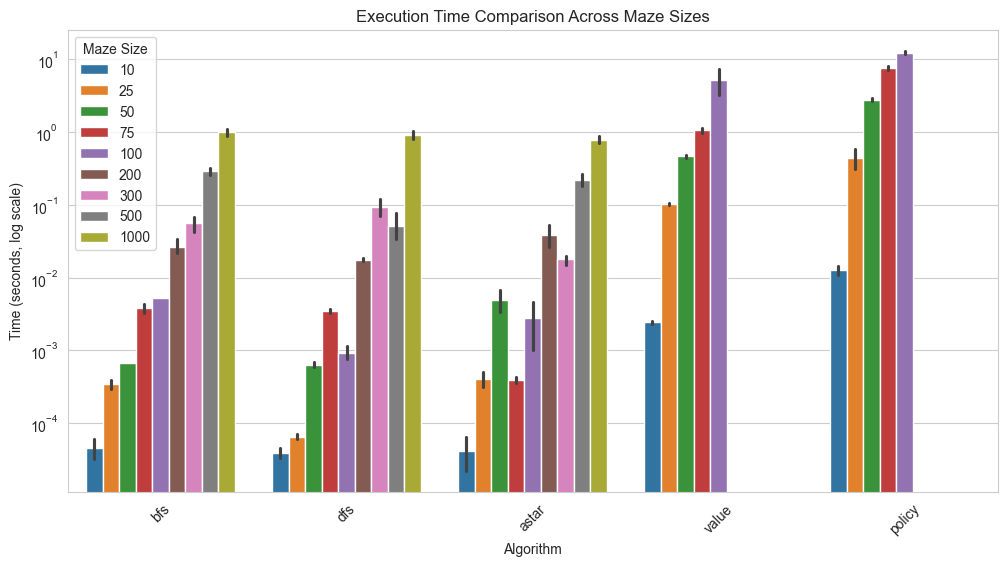

In [83]:
### 1. Execution Time Comparison ###
plt.figure(figsize=(12,6))
sns.barplot(data=df_filtered, x="Algorithm", y="Execution Time", hue="Maze Size")
plt.yscale("log")  
plt.title("Execution Time Comparison Across Maze Sizes")
plt.ylabel("Time (seconds, log scale)")
plt.xlabel("Algorithm")
plt.legend(title="Maze Size")
plt.xticks(rotation=45)
plt.show()

### **Observations:**
- As the **maze size increases**, the execution time also **increases** across all algorithms
- **Policy Iteration is computationally heavier than Value Iteration** due to repeated policy evaluations
- **MDP algorithms** tend to have a higher execution time compared to search algorithms due to solving for all states


## **Memory Usage Comparison**
This section compares **how much memory** each algorithm uses when solving different maze sizes

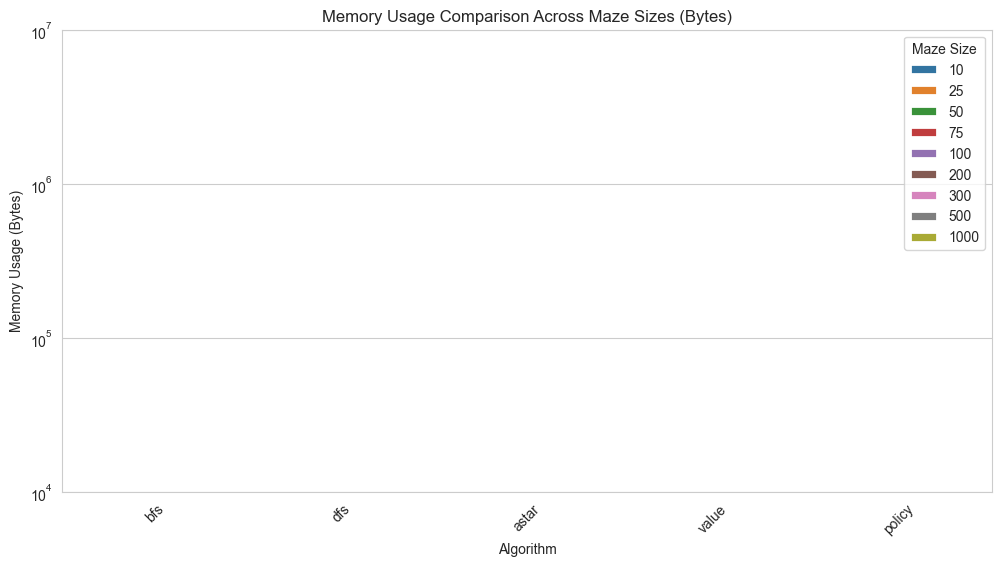

In [84]:
### 2. Memory Usage Comparison (Bytes) ###
plt.figure(figsize=(12,6))
sns.barplot(data=df_filtered, x="Algorithm", y="Memory Usage", hue="Maze Size", linewidth=2)
plt.yscale("log")  
plt.ylim(1e4, 1e7)  
plt.title("Memory Usage Comparison Across Maze Sizes (Bytes)")
plt.ylabel("Memory Usage (Bytes)")
plt.xlabel("Algorithm")
plt.legend(title="Maze Size")
plt.xticks(rotation=45)
plt.show()

### **Observations:**
- **BFS has the highest memory usage** among the search algorithms, especially for large mazes due to soting all nodes in memory
- **DFS** uses less memory than BFS in smaller mazes but has **high memory usage** in large mazes
- **Policy Iteration consumes more memory** than Value Iteration due to soting policies and additional updates.
- **Memory usage increases exponentially** as the maze size grows.

## **Path Length Analysis**
Path length is important for measuring **efficiency**.  
We see here how **search and MDP algorithms** differ in the paths they generate

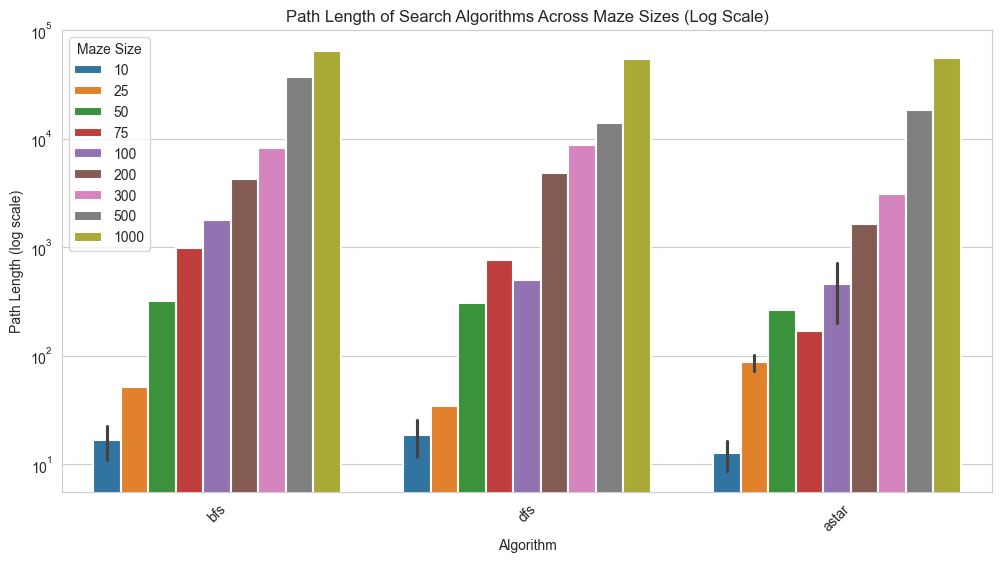

In [85]:
### 3. Path Length Comparison (Search Algorithms) ###
plt.figure(figsize=(12,6))
sns.barplot(data=search_algos, x="Algorithm", y="Path Length", hue="Maze Size", linewidth=1.5)
plt.yscale("log")  # Apply log scale
plt.title("Path Length of Search Algorithms Across Maze Sizes (Log Scale)")
plt.ylabel("Path Length (log scale)")
plt.xlabel("Algorithm")
plt.legend(title="Maze Size")
plt.xticks(rotation=45)
plt.show()


### **Observations (Search Algorithms):**
- **DFS typically produces the longest paths**, as it does not optimise for efficiency
- **A* generates the shortest paths** due to its heuristic-based approach
- **BFS ensures the shortest path** but can still explore widely before finding the goal

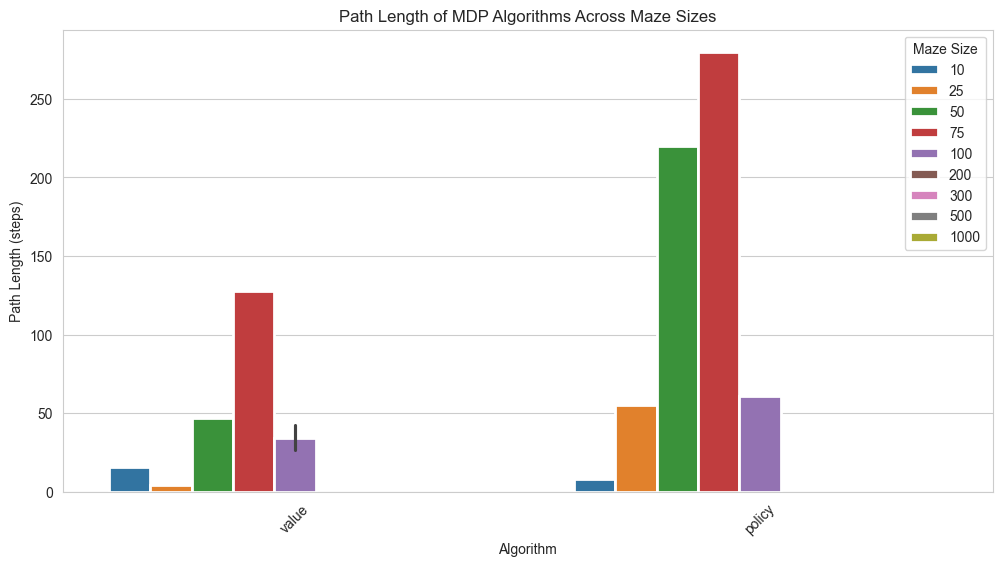

In [92]:
### 4. Path Length Comparison (MDP Algorithms) ###
plt.figure(figsize=(12,6))
sns.barplot(data=mdp_algos, x="Algorithm", y="Path Length", hue="Maze Size", linewidth=2)
plt.title("Path Length of MDP Algorithms Across Maze Sizes")
plt.ylabel("Path Length (steps)")
plt.xlabel("Algorithm")
plt.legend(title="Maze Size")
plt.xticks(rotation=45)
plt.show()

### **Observations (MDP Algorithms):**
- **Policy iteration usually converges faster than value iteration**, but here it seems to take longer paths, which could indicate an issue with stopping conditions or policy updates.
- **MDP algorithms should produce the shortest path in general** as it optimises decisions over all states

## **Success Rate & Failed Paths**
A higher success rate means an algorithm successfully finds a path more often.  
We also analyse how often algorithms fail to find a valid path.

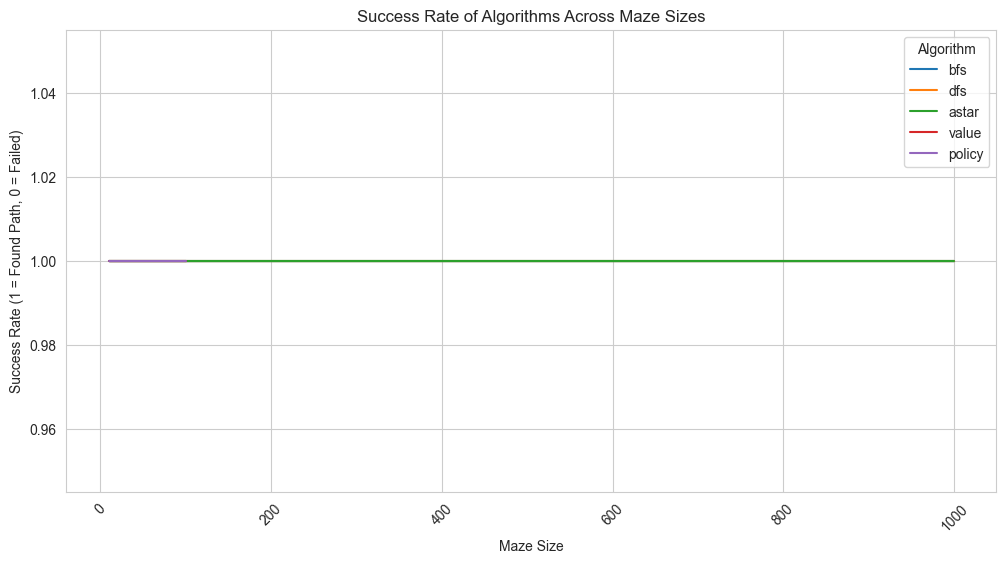

In [87]:
### 8. Success Rate Across Maze Sizes ###
plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x="Maze Size", y="Success", hue="Algorithm")
plt.title("Success Rate of Algorithms Across Maze Sizes")
plt.ylabel("Success Rate (1 = Found Path, 0 = Failed)")
plt.xlabel("Maze Size")
plt.legend(title="Algorithm")
plt.xticks(rotation=45)
plt.show()

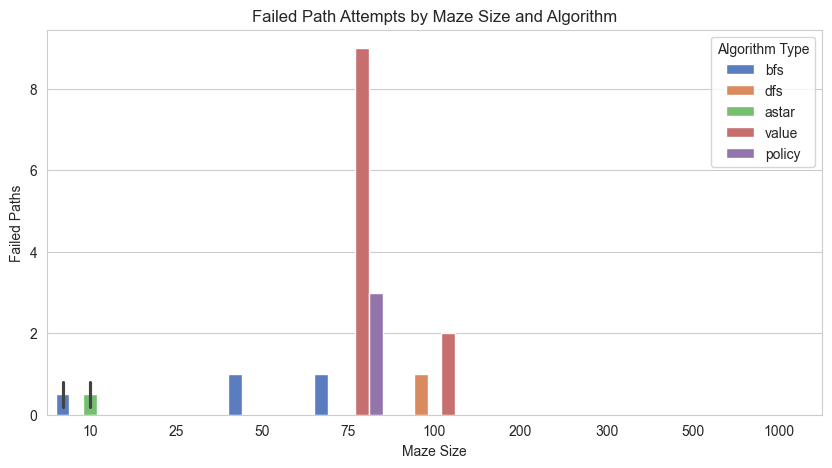

In [88]:
### 14. Plot Failed Path Attempts per Maze Size
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Maze Size", y="Failed Paths", hue="Algorithm", palette="muted")
plt.title("Failed Path Attempts by Maze Size and Algorithm")
plt.xlabel("Maze Size")
plt.ylabel("Failed Paths")
plt.legend(title="Algorithm Type")
plt.show()

### **Observations:**
- **As the maze size increases**, the number of failed paths tend to increase
- **Value Iteration and Policy Iteration have the most failures**, suggesting a struggle with certain maze configurations
- **Search algorithms** have lower failure rates

## **Convergence Rate Analysis**
For **MDP algorithms**, convergence rate measures how **quickly** the algorithm stabilizes on an optimal policy.  
A higher convergence rate means the algorithm finds a solution faster.


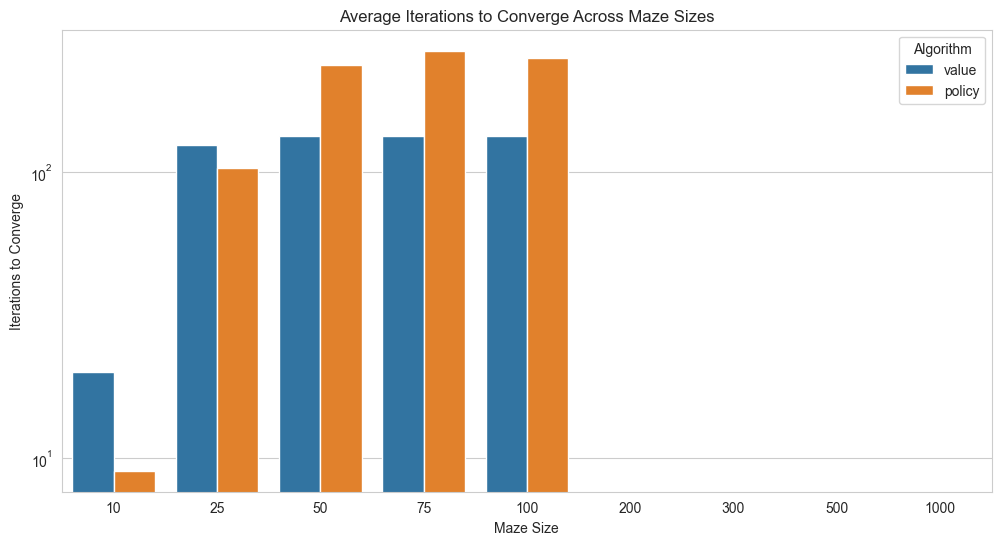

In [93]:
### 9. Convergence Rate vs Execution Time (MDP Algorithms) ###
plt.figure(figsize=(12,6))
sns.barplot(data=mdp_algos, x="Maze Size", y="Convergence Rate", hue="Algorithm")
plt.title("Average Iterations to Converge Across Maze Sizes")
plt.ylabel("Iterations to Converge")
plt.xlabel("Maze Size")
plt.legend(title="Algorithm")
plt.yscale("log")
plt.show()

### **Observations:**
- **Value Iteration and Policy Iteration** tend to **converge more slowly on larger mazes**
- **Larger mazes** lead to a drop in convergence rate

## **Nodes Expanded Analysis**
This analysis examines how the number of **nodes expanded** by search algorithms changes as the **maze size increases**.  

Nodes expanded represents the number of states explored before finding a solution, which provides insights into the efficiency of each search algorithm.  


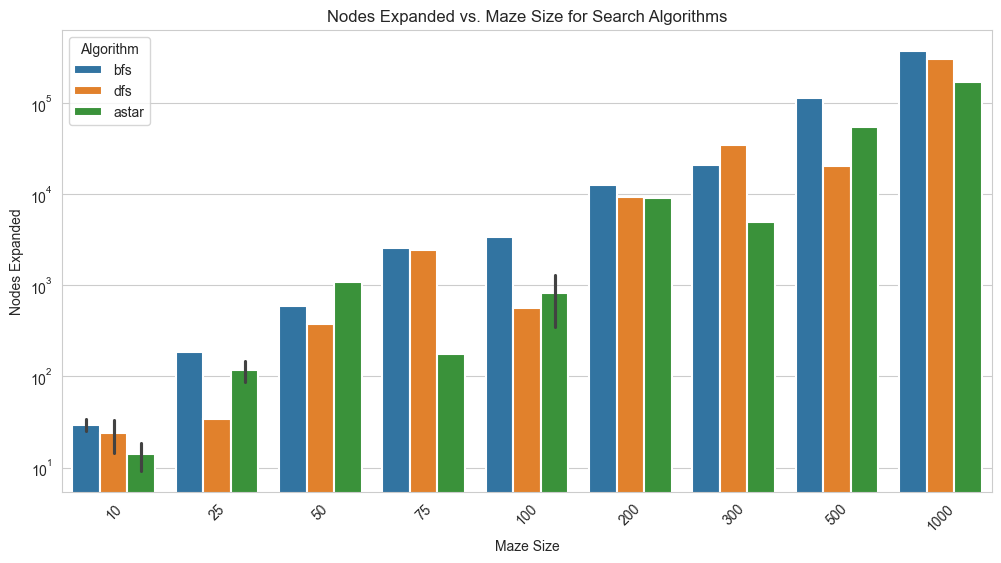

In [94]:
### 9. Nodes Expanded vs Execution Time (Search Algorithms) ###
plt.figure(figsize=(12,6))
sns.barplot(data=search_algos, x="Maze Size", y="Nodes Expanded", hue="Algorithm", linewidth=1.5)
plt.title("Nodes Expanded vs. Maze Size for Search Algorithms")
plt.ylabel("Nodes Expanded")
plt.xlabel("Maze Size")
plt.legend(title="Algorithm")
plt.yscale("log")  # Log scale to handle large values
plt.xticks(rotation=45)
plt.show()

### **Observations:**
- **BFS** expands significantly more nodes compared to **DFS** and **A* Search** in larger modes, due to BFS exploring **all possible paths** level-by-level, making it **complete by costly** in terms of expansion
- **DFS** initally expands fewer nodes as it follows a single path deeper before backtracking.
- **In smaller mazes**, A* sometimes expands a similar number of nodes as BFS, possibly due to its heuristic requiring extra computation

### **Relationship Between Execution Time and Path Length**
This section explores the **correlation between path length and execution time**.  
Longer paths might indicate inefficiencies in the algorithm, resulting in **higher computation time**.


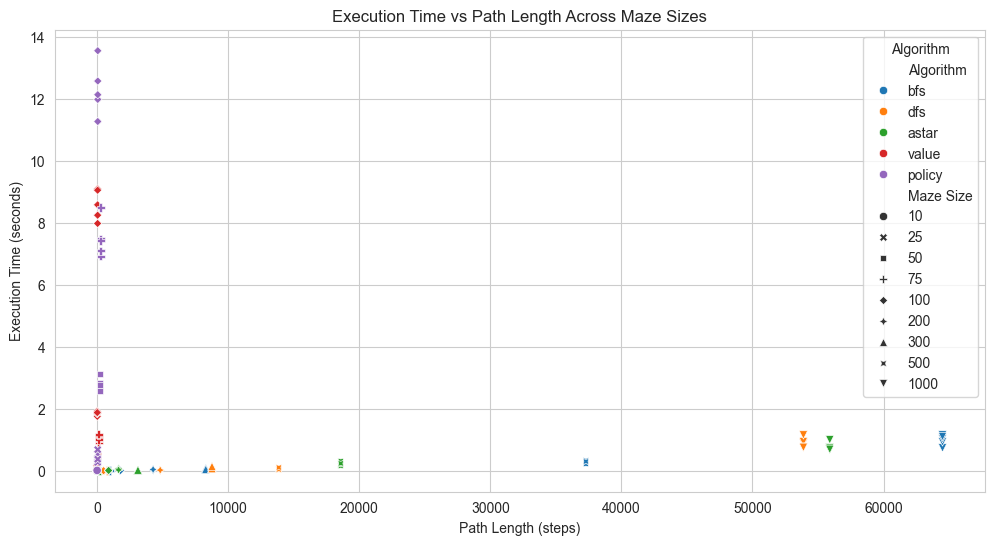

In [97]:
### 10. Execution Time vs Path Length ###
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filtered, x="Path Length", y="Execution Time", hue="Algorithm", style="Maze Size", markers=True)
plt.title("Execution Time vs Path Length Across Maze Sizes")
plt.xlabel("Path Length (steps)")
plt.ylabel("Execution Time (seconds)")
plt.legend(title="Algorithm")
plt.show()

### **Observations:**

- **MDP algorithms take much longer** to execute compared to search algorithms, even for short paths due to iterative computational overhead
- **Search algorithms efficiently handle long paths**, with low and stable execution time
- **Execution time does not always scale linearly with path length**, especially for MDP algorithms
- **Search algorithms show better scalability**, maintaining lower execution times even as path length increases

### **Observations:**
- **DFS shows high variability** in execution time due to its unpredictable search patterns
- **A* and BFS maintain a stable trend**, as they prioritize shorter paths
- **MDP algorithms show significant outliers**, indicating occasional inefficient policy convergence

## **Invalid Maze Generation Attempts**
Some mazes are **generated incorrectly** due to **unreachable start or goal states**.  
This visualisation highlights **how often maze generation fails** for different algorithms and maze sizes.


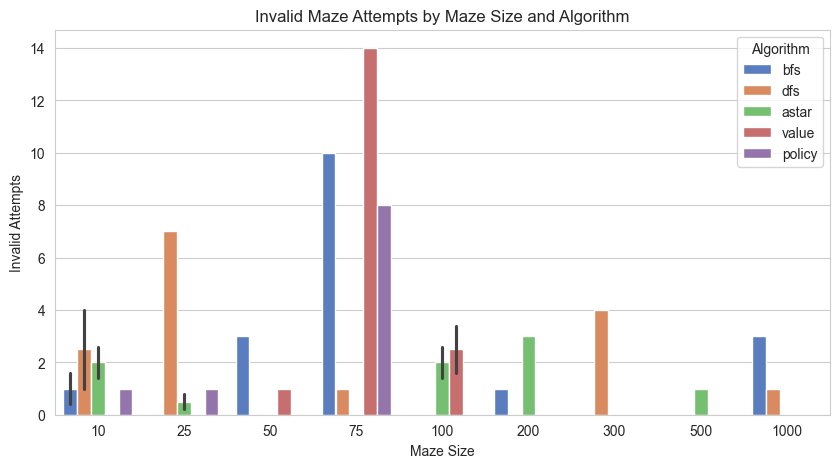

Visualisation complete. Charts generated.


In [91]:
### 13. Plot Invalid Maze Attempts per Maze Size
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Maze Size", y="Invalid Maze Attempts", hue="Algorithm", palette="muted")
plt.title("Invalid Maze Attempts by Maze Size and Algorithm")
plt.xlabel("Maze Size")
plt.ylabel("Invalid Attempts")
plt.legend(title="Algorithm")
plt.show()

print("Visualisation complete. Charts generated.")
plt.close('all')
